In [243]:
import os 
import sys

import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import xgboost as xgb

from scipy.stats import kurtosis, entropy
from scipy.fft import fft

sys.path.append(r"c:\Users\keng-tse\Desktop\csi_tool") #這行為絕對路徑，如需使用，必須要修改為當前決路徑
import csi_tool
import denoise 

In [245]:
def load_data(reference_points):
    data = []          # 用于存储所有数据
    rp_labels = []     # 用于存储参考点编号标签
    coord_labels = []  # 用于存储 (x, y) 坐标标签

    for path, (ref_id, coord) in reference_points.items():
        df = pd.read_excel(path)
        data.append(df.values)
        rp_labels.extend([ref_id] * len(df))
        coord_labels.extend([coord] * len(df))
    data = pd.DataFrame(np.vstack(data))
    rp_labels = pd.Series(rp_labels, name="Reference Point ID")
    coord_labels = pd.DataFrame(coord_labels, columns=["X", "Y"])
    return data, rp_labels, coord_labels

In [247]:
data = df = pd.read_excel(r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\localization_phone\0212_time_ob\csv\reference_point1_1.xlsx")

In [249]:
data

,852.078048,842.750260,809.084050,813.049814,798.110268,777.638091,771.064848,759.479427,747.920450,723.531616,...,-2.750263,-2.949378,3.130493,2.642723,2.394291,2.126348,1.824330,1.448635,-52.000000,136.000000
0,673.085433,657.902728,626.083860,614.706434,601.984219,624.347660,618.867514,596.524937,586.621684,588.008503,...,1.045941,0.847761,0.640679,0.155646,-0.126569,-0.419384,-0.718948,-1.079425,-51,136
1,604.073671,622.993579,576.035589,586.965927,541.867142,553.911545,567.242453,643.979037,669.664095,702.573840,...,2.832566,2.579587,2.347240,1.739272,1.464351,1.117136,0.791983,0.406338,-49,148
2,711.629819,702.078343,705.138993,684.748129,680.555655,648.593864,641.290106,627.873395,651.307915,614.654374,...,-0.049526,-0.259116,-0.474371,-0.931266,-1.176983,-1.471357,-1.783428,-2.145392,-50,136
3,582.571026,599.650732,570.940452,577.044192,542.952116,534.431474,544.969724,615.906649,661.399274,671.512472,...,-2.191758,-2.488423,-2.773173,2.863091,2.541663,2.154477,1.723759,1.298871,-49,148
4,670.821139,656.515042,615.434806,596.419316,607.988487,604.127470,605.650890,599.441407,583.082327,566.611860,...,0.706260,0.494208,0.283689,-0.214116,-0.496470,-0.795480,-1.081658,-1.445964,-51,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,602.050662,623.471732,592.197602,596.149310,561.471282,553.827591,568.960456,639.094672,678.457810,701.141926,...,0.132946,-0.080795,-0.270342,-0.793495,-1.029681,-1.344715,-1.628450,-1.978226,-49,148
95,732.847187,705.360192,716.249258,678.902791,688.564449,661.889719,669.086691,643.024105,663.597770,632.785904,...,2.620135,2.422987,2.228599,1.842757,1.586777,1.326960,0.999940,0.645168,-50,136
96,581.755963,588.918500,577.478138,573.021815,543.014733,525.460750,535.627669,606.976112,656.457919,662.559431,...,-0.506235,-0.744544,-0.971591,-1.510808,-1.775620,-2.091727,-2.422496,-2.791570,-49,148
97,673.412949,658.290210,640.188254,622.877195,611.265082,606.485779,601.199634,589.755882,584.097595,574.040068,...,-0.373154,-0.539270,-0.736473,-1.114791,-1.363500,-1.643039,-1.965390,-2.306694,-51,136


In [251]:
amp1 = data.iloc[:,:48]
amp1_p = denoise.preprocess_csi_for_fingerprint2(np.array(amp1))

In [253]:
data2 = pd.read_excel(r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\localization_phone\0212_time_ob\csv\reference_point2_1.xlsx")

In [255]:
amp2 = data2.iloc[:,:48]
amp2_p = denoise.preprocess_csi_for_fingerprint2(np.array(amp2))

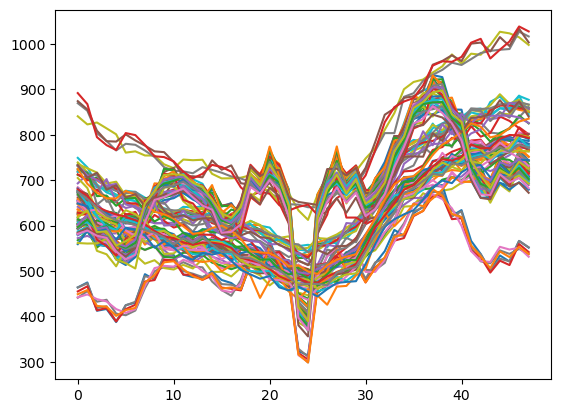

In [257]:
import matplotlib.pyplot as plt
amp1.shape[0]
for i in range(amp1.shape[0]):
    plt.plot(range(48),amp1.iloc[i])
#plt.plot(amp1)

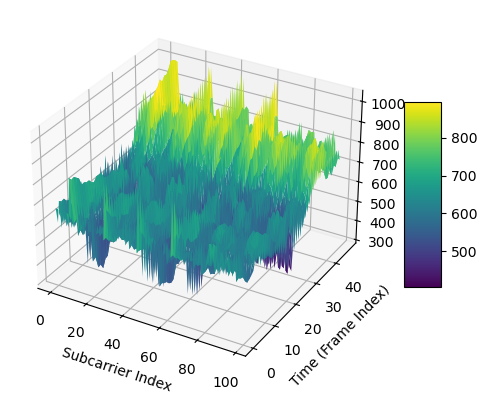

In [337]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 假設 amp2_p shape = (num_frames, num_subcarriers)
num_frames, num_subcarriers = amp1.shape

# 建立網格座標
X = np.arange(num_subcarriers)               # Subcarrier Index
Y = np.arange(num_frames)                    # Time Index
X, Y = np.meshgrid(X, Y)                     # X.shape, Y.shape => (num_frames, num_subcarriers)

Z = amp1                                  # 與 X, Y 之 shape 相同即可，如 (num_frames, num_subcarriers)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 畫 3D surface
# alpha可調整透明度, cmap可換色盤, 如 'viridis', 'jet', 'plasma'...
surf = ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='none')

# 若想用 wireframe，可改用:
# ax.plot_wireframe(X, Y, Z, color='blue')

ax.set_xlabel('Subcarrier Index')
ax.set_ylabel('Time (Frame Index)')
ax.set_zlabel('Amplitude')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [259]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp1.values, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp1.values, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp1.values, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: [ 81.29520164  72.15066798  74.61691662  69.65137569  76.08366987
  72.62086935  68.2389909   54.37413128  58.07826237  65.93248101
  69.1252018   68.33900911  66.22890553  61.11192339  59.28697925
  52.26853248  53.82038254  56.75225717  83.13824292  79.6679929
 100.58120783  91.89887349  74.89702275  67.5281921   73.56157736
  71.66637798  91.23713187 100.69380914  79.20629766  84.70911349
  59.23568344  58.59447481  60.21557961  68.33186918  71.89964608
  86.51748068  85.52220664  89.61551477  84.85223327  73.79877645
  68.1534511   79.22967073  88.77504713  94.78164432  87.84804531
  91.17285786  87.92569827  89.52145989]
VAR: [ 6608.90981003  5205.71889066  5567.68424556  4851.31413553
  5788.72482059  5273.79066463  4656.55987882  2956.546152
  3373.08455976  4347.0920522   4778.29352443  4670.22016555
  4386.26792735  3734.66718101  3514.94590846  2731.99948739
  2896.63357725  3220.81869333  6911.96743639  6346.98909295
 10116.57936909  8445.40294938  5609.5640166

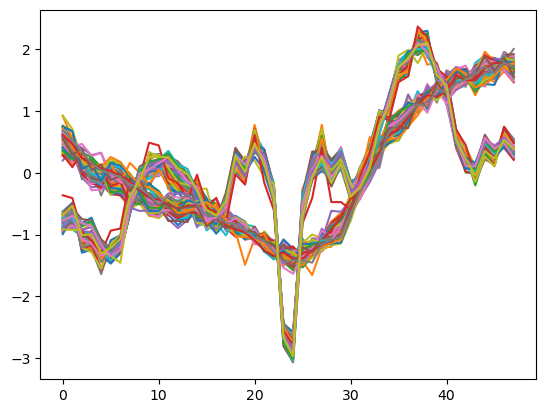

In [261]:
for i in range(amp1_p.shape[0]):
    plt.plot(range(48),amp1_p[i])
    

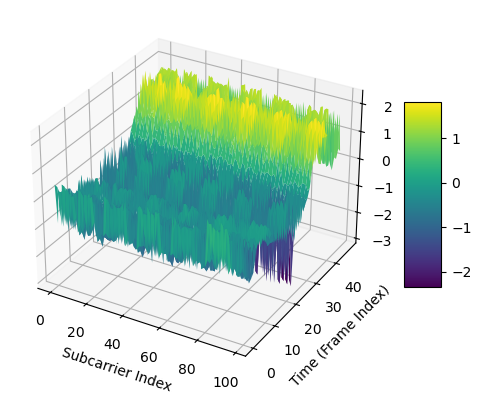

In [339]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 假設 amp2_p shape = (num_frames, num_subcarriers)
num_frames, num_subcarriers = amp1_p.shape

# 建立網格座標
X = np.arange(num_subcarriers)               # Subcarrier Index
Y = np.arange(num_frames)                    # Time Index
X, Y = np.meshgrid(X, Y)                     # X.shape, Y.shape => (num_frames, num_subcarriers)

Z = amp1_p                                   # 與 X, Y 之 shape 相同即可，如 (num_frames, num_subcarriers)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 畫 3D surface
# alpha可調整透明度, cmap可換色盤, 如 'viridis', 'jet', 'plasma'...
surf = ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='none')

# 若想用 wireframe，可改用:
# ax.plot_wireframe(X, Y, Z, color='blue')

ax.set_xlabel('Subcarrier Index')
ax.set_ylabel('Time (Frame Index)')
ax.set_zlabel('Amplitude')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [263]:
print(amp1_p.shape)

(99, 48)


In [265]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp1_p, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp1_p, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp1_p, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: [0.67918223 0.5474516  0.60264579 0.54595728 0.65038796 0.61822854
 0.54240067 0.17746877 0.13877428 0.3125238  0.35535601 0.32458362
 0.29833626 0.21771996 0.20001525 0.12519054 0.11712085 0.16502157
 0.54648442 0.50112791 0.77371351 0.66642959 0.45656337 0.62916269
 0.7153884  0.41971961 0.66404223 0.77670648 0.49968246 0.55952852
 0.16459619 0.1293225  0.1277128  0.23709753 0.2230645  0.46477997
 0.44436862 0.48688406 0.4202629  0.14777826 0.1143948  0.51689047
 0.68645031 0.76867356 0.63687114 0.70370656 0.62709788 0.68394647]
VAR: [0.4612885  0.29970325 0.36318195 0.29806936 0.4230045  0.38220652
 0.29419849 0.03149517 0.0192583  0.09767113 0.12627789 0.10535453
 0.08900452 0.04740198 0.0400061  0.01567267 0.01371729 0.02723212
 0.29864522 0.25112919 0.59863259 0.4441284  0.20845011 0.39584568
 0.51178056 0.17616455 0.44095209 0.60327295 0.24968256 0.31307217
 0.0270919  0.01672431 0.01631056 0.05621524 0.04975777 0.21602042
 0.19746347 0.23705609 0.17662091 0.021838

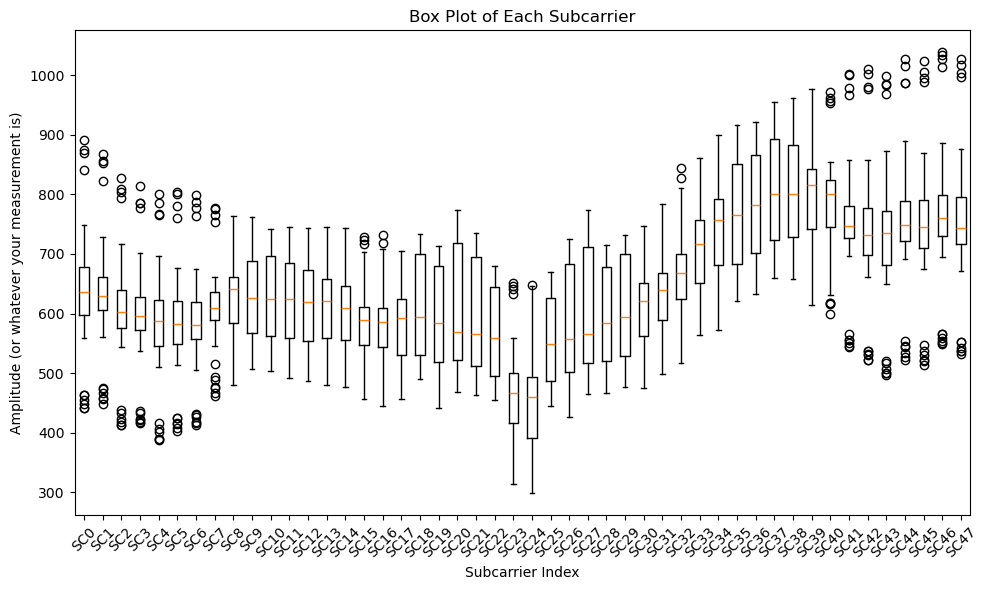

In [345]:
import matplotlib.pyplot as plt

# 假設 amp1.values.shape = (num_frames, num_subcarriers)
data = amp1.values  # 或 np.array(...)，形狀 (時間×子載波)

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=[f"SC{i}" for i in range(data.shape[1])])

plt.title("Box Plot of Each Subcarrier")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude (or whatever your measurement is)")
plt.xticks(rotation=45)  # 如果子載波多，可以稍微旋轉標籤避免重疊
plt.tight_layout()
plt.show()


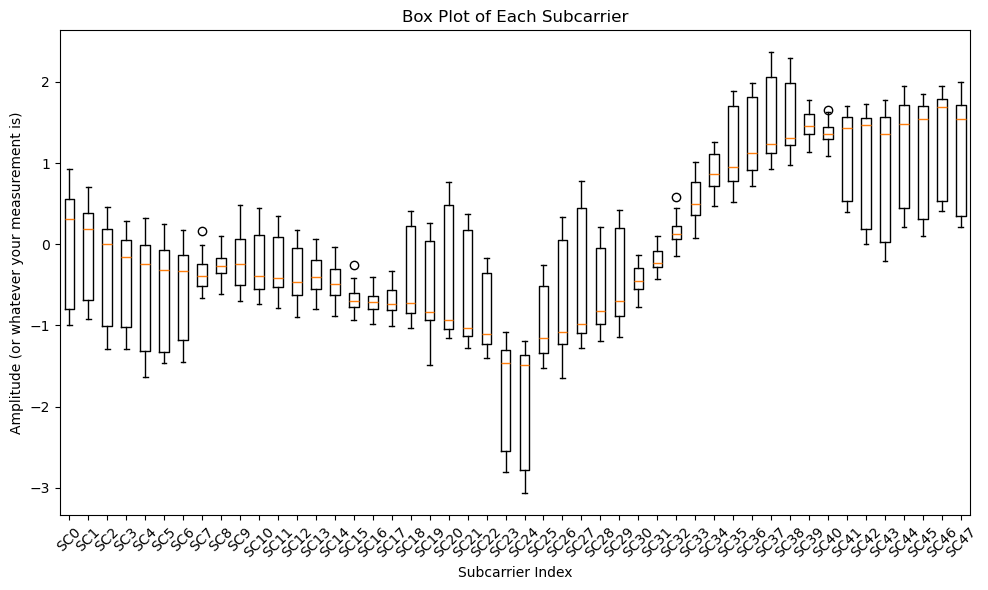

In [347]:
data = amp1_p
# 或 np.array(...)，形狀 (時間×子載波)

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=[f"SC{i}" for i in range(data.shape[1])])

plt.title("Box Plot of Each Subcarrier")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude (or whatever your measurement is)")
plt.xticks(rotation=45)  # 如果子載波多，可以稍微旋轉標籤避免重疊
plt.tight_layout()
plt.show()


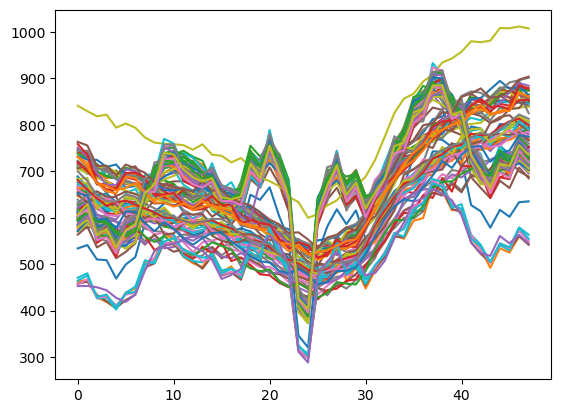

In [269]:
for i in range(amp2.shape[0]):
    plt.plot(range(48),amp2.iloc[i])

In [271]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp2.values, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp2.values, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp2.values, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")


各子載波統計量:
STD: [ 73.17151869  65.08702348  70.3107143   67.2243095   73.73709691
  68.11388947  63.16364024  50.01112221  54.15508215  65.46588404
  68.72884907  66.11917748  64.74862252  59.15553679  56.98058035
  50.19205263  49.76055063  54.37233035  81.33561401  77.0793605
 102.85106821  89.9263429   71.03814606  63.10866839  67.27916622
  65.86672064  86.71954027  98.0654002   72.37322716  77.79013222
  52.20943991  52.4300853   52.30137246  62.89155559  64.25470261
  79.48681268  79.55023543  84.52541213  80.85028472  66.31187985
  63.80122448  72.90339155  82.3454806   90.86299847  81.83492269
  86.27630494  78.97701246  82.67348555]
VAR: [ 5354.07114773  4236.32062512  4943.59654585  4519.10778829
  5437.15946117  4639.5019383   3989.64544801  2501.11234506
  2932.7729223   4285.78197373  4723.65469427  4371.74563124
  4192.38411772  3499.37753323  3246.78653653  2519.24214771
  2476.11239851  2956.35030804  6615.4821062   5941.22781448
 10578.34223174  8086.74714809  5046.41819

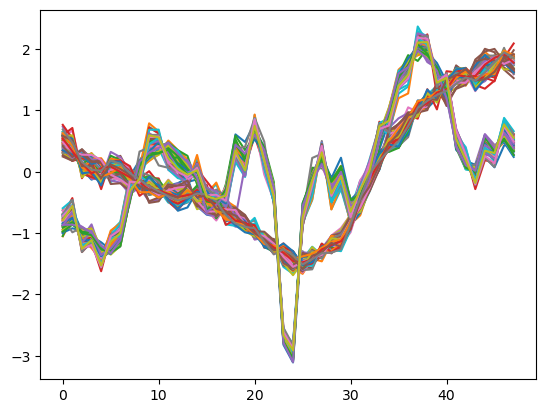

In [273]:
for i in range(amp2_p.shape[0]):
    plt.plot(range(48),amp2_p[i])

In [275]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp2_p, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp2_p, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp2_p, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: [0.67350441 0.54603434 0.6389569  0.58449601 0.69989651 0.62670772
 0.55358616 0.13999394 0.13045173 0.35248307 0.38767884 0.31850208
 0.30017027 0.19963481 0.2228001  0.11186048 0.12470339 0.15504358
 0.55784758 0.50441133 0.8429267  0.67163274 0.44250314 0.67309823
 0.74432799 0.39619256 0.63256383 0.79318857 0.45163649 0.5314757
 0.14016843 0.13416465 0.12775291 0.24842273 0.21679442 0.45874527
 0.43646474 0.53975963 0.45456187 0.1630953  0.11807509 0.50791392
 0.68891408 0.80470594 0.65120239 0.72750408 0.6087158  0.67402177]
VAR: [0.45360819 0.2981535  0.40826593 0.34163559 0.48985512 0.39276257
 0.30645764 0.0195983  0.01701765 0.12424431 0.15029488 0.10144358
 0.09010219 0.03985406 0.04963989 0.01251277 0.01555094 0.02403851
 0.31119392 0.25443079 0.71052542 0.45109054 0.19580903 0.45306123
 0.55402415 0.15696854 0.400137   0.6291481  0.20397552 0.28246642
 0.01964719 0.01800015 0.01632081 0.06171385 0.04699982 0.21044722
 0.19050147 0.29134046 0.2066265  0.0266000

In [279]:
data3 = pd.read_excel(r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\localization_phone\0212_time_ob\csv\reference_point3_1.xlsx")

In [281]:
amp3 = data3.iloc[:,:48]
amp3_p = denoise.preprocess_csi_for_fingerprint2(np.array(amp3))

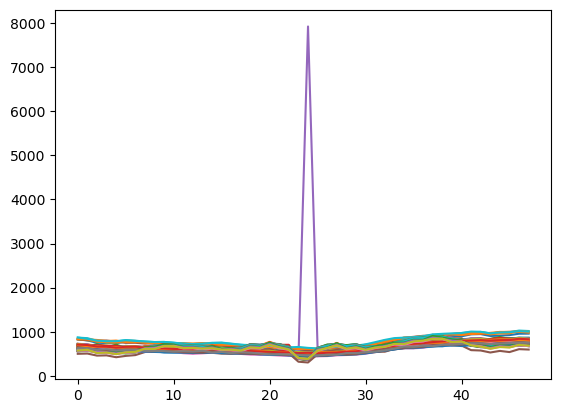

In [303]:
for i in range(amp3.shape[0]):
    plt.plot(np.arange(48),amp3.iloc[i,:])

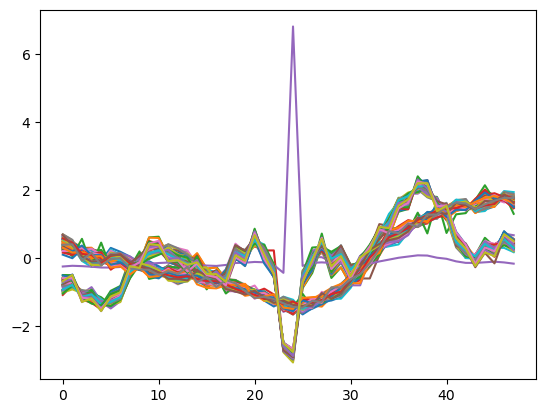

In [307]:
for i in range(amp3_p.shape[0]):
    plt.plot(np.arange(48),amp3_p[i,:])

In [309]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp3, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp3, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp3, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: 589.712642     74.120644
597.850316     64.780268
588.695167     69.552907
585.000000     64.177475
568.738956     72.970884
550.272660     69.308098
563.937053     62.859684
635.824661     47.532853
696.347614     48.084242
693.952448     61.367693
711.180708     63.813408
720.117352     58.812359
706.917958     58.084321
689.280785     52.820794
662.487736     54.017416
612.474489     46.991528
617.408293     46.821355
634.137209     47.220527
712.851317     74.118736
689.383783     70.391367
720.923019     98.495684
701.410721     83.549979
646.062690     66.666408
406.773893     63.317995
373.546517    750.033955
607.363153     62.632168
657.012176     82.756015
678.451914     96.926570
642.299774     69.183462
669.932832     74.306139
615.293426     47.428457
634.193977     49.953092
655.116783     52.549939
712.166413     60.144884
762.502459     57.741418
824.878779     74.332643
836.495666     73.882735
860.751416     81.968397
854.523259     77.738190
830.918167 

In [311]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp3_p, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp3_p, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp3_p, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: [0.63620904 0.51756412 0.63174195 0.56534968 0.68448064 0.60934268
 0.5272109  0.15246197 0.11567175 0.32796411 0.37224475 0.30702401
 0.29966894 0.22006811 0.22174778 0.13790678 0.13154412 0.16000149
 0.52460434 0.482417   0.80595319 0.63576082 0.44412334 0.6462061
 1.1355562  0.41454051 0.63413629 0.791098   0.46672874 0.53324753
 0.16921644 0.17528754 0.16129435 0.25490938 0.23162983 0.47188063
 0.45466977 0.54580044 0.47867845 0.20501901 0.19288563 0.52764337
 0.68527155 0.78852461 0.67705999 0.74357785 0.6246285  0.66412397]
VAR: [0.40476195 0.26787262 0.39909789 0.31962026 0.46851375 0.3712985
 0.27795134 0.02324465 0.01337995 0.10756046 0.13856615 0.09426374
 0.08980147 0.04842997 0.04917208 0.01901828 0.01730385 0.02560048
 0.27520971 0.23272616 0.64956055 0.40419182 0.19724554 0.41758232
 1.28948789 0.17184383 0.40212883 0.62583605 0.21783571 0.28435293
 0.0286342  0.03072572 0.02601587 0.06497879 0.05365238 0.22267133
 0.2067246  0.29789812 0.22913306 0.0420328 

In [313]:
data4 = pd.read_excel(r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\localization_phone\0212_time_ob\csv\reference_point4_1.xlsx")
amp4 = data4.iloc[:,:48]
amp4_p = denoise.preprocess_csi_for_fingerprint2(np.array(amp4))

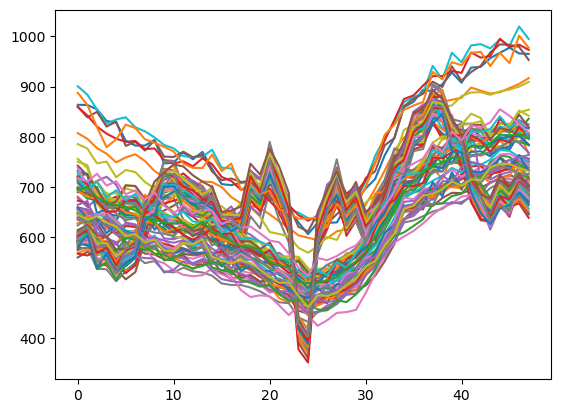

In [315]:
for i in range(amp4.shape[0]):
    plt.plot(np.arange(48),amp4.iloc[i,:])

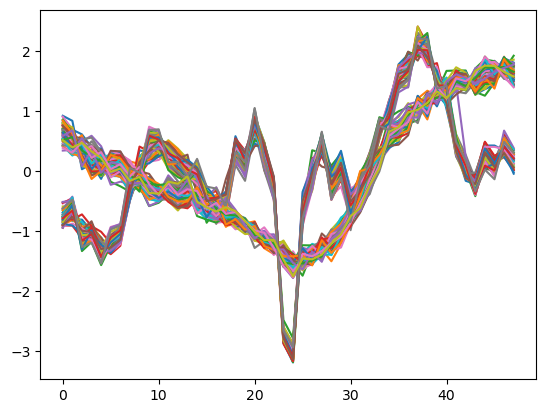

In [319]:
for i in range(amp4_p.shape[0]):
    plt.plot(np.arange(48),amp4_p[i,:])

In [321]:
# 逐个子载波计算统计量
subcarrier_std = np.std(amp4, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp4, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp4, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: 718.891508     74.607725
705.034751     65.770984
682.806708     72.547498
648.277718     65.275360
664.754090     74.203025
668.401077     68.047044
660.131048     63.052387
640.272598     48.093604
638.774608     50.592201
625.411864     62.471420
620.519943     65.653179
605.990924     57.952743
602.000831     56.633449
601.040764     51.241444
611.624068     55.356194
581.288225     44.743216
590.793534     46.935635
558.108412     46.095103
573.600907     75.247078
560.746823     71.184361
568.000880    100.640017
539.573906     84.809426
528.802421     67.090715
525.290396     62.753844
510.381230     68.818010
515.617106     62.385554
510.955967     81.099585
533.973782     97.732440
528.910200     66.872139
545.550181     72.573738
582.115109     46.136765
606.003300     48.905265
660.364293     50.253466
668.146690     57.232710
694.504140     55.740497
701.088439     70.435715
710.886770     69.200400
757.491914     78.880708
747.602167     72.141385
774.344239 

In [323]:
data_pi2 = df = pd.read_excel(r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\localization_phone_pi2\P1P2\csv\reference_point_1_pi2.xlsx")

In [325]:
amp_pi2 = data_pi2.iloc[:,:48]
amp_pi2_p = denoise.preprocess_csi_for_fingerprint2(np.array(amp_pi2))

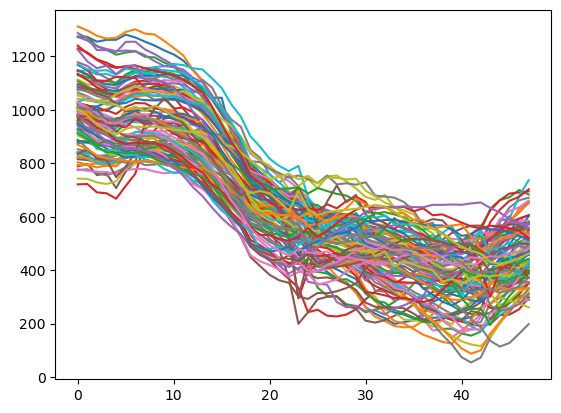

In [327]:
for i in range(amp_pi2.shape[0]):
    plt.plot(np.arange(48),amp_pi2.iloc[i,:])

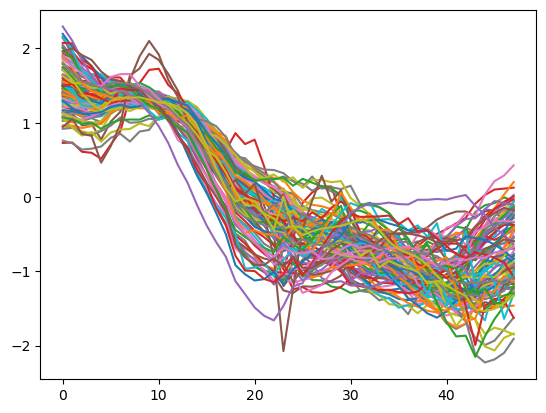

In [329]:
for i in range(amp_pi2_p.shape[0]):
    plt.plot(np.arange(48),amp_pi2_p[i,:])

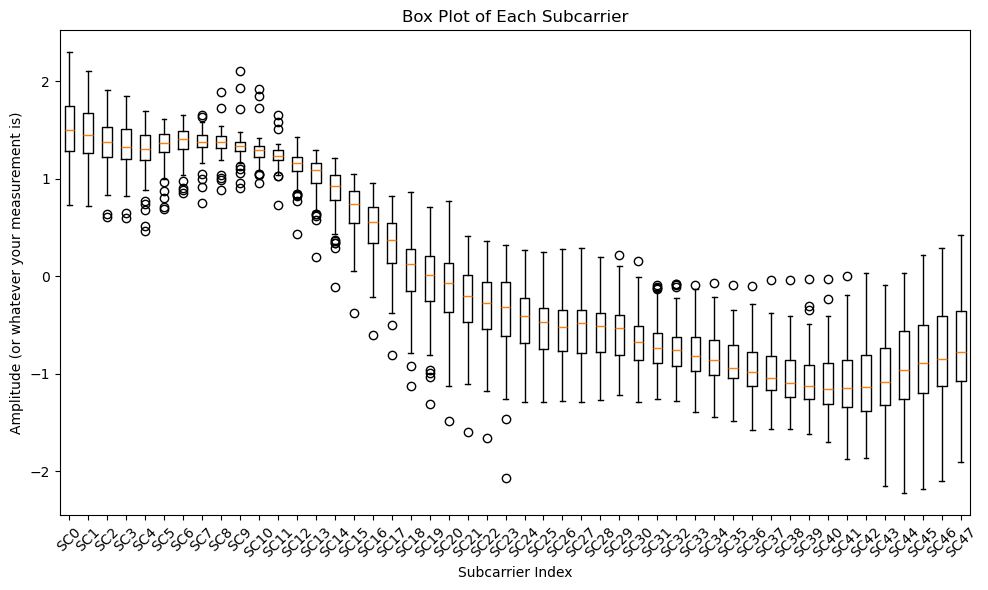

In [349]:

# 或 np.array(...)，形狀 (時間×子載波)

plt.figure(figsize=(10, 6))
plt.boxplot(amp_pi2_p, labels=[f"SC{i}" for i in range(data.shape[1])])

plt.title("Box Plot of Each Subcarrier")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude (or whatever your measurement is)")
plt.xticks(rotation=45)  # 如果子載波多，可以稍微旋轉標籤避免重疊
plt.tight_layout()
plt.show()

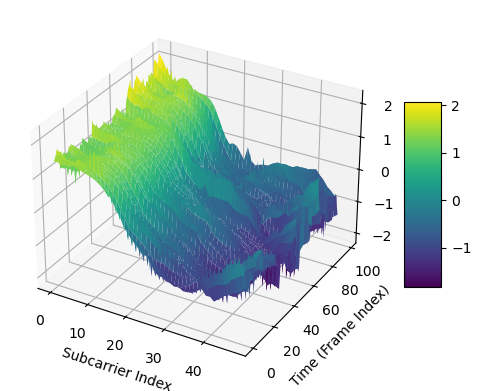

In [343]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 假設 amp2_p shape = (num_frames, num_subcarriers)
num_frames, num_subcarriers = amp_pi2_p.shape

# 建立網格座標
X = np.arange(num_subcarriers)               # Subcarrier Index
Y = np.arange(num_frames)                    # Time Index
X, Y = np.meshgrid(X, Y)                     # X.shape, Y.shape => (num_frames, num_subcarriers)

Z = amp_pi2_p                                  # 與 X, Y 之 shape 相同即可，如 (num_frames, num_subcarriers)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 畫 3D surface
# alpha可調整透明度, cmap可換色盤, 如 'viridis', 'jet', 'plasma'...
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# 若想用 wireframe，可改用:
# ax.plot_wireframe(X, Y, Z, color='blue')

ax.set_xlabel('Subcarrier Index')
ax.set_ylabel('Time (Frame Index)')
ax.set_zlabel('Amplitude')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

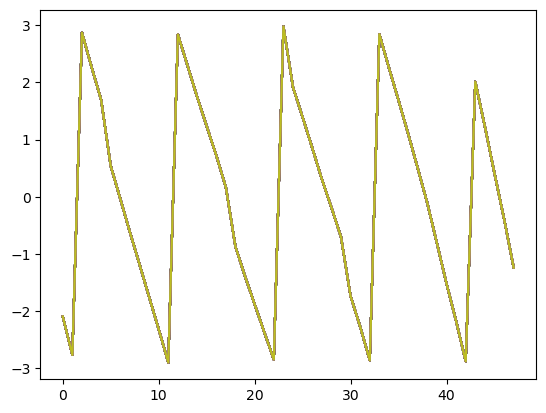

In [233]:
for i in range(amp_pi2.shape[0]):
    plt.plot(np.arange(48),data_pi2.iloc[80,48:-2])

In [235]:
subcarrier_std = np.std(amp_pi2_p, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp_pi2_p, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp_pi2_p, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: [0.34467987 0.30437278 0.27247149 0.24616529 0.23495473 0.18196935
 0.15308641 0.1314176  0.12579655 0.14023296 0.12991048 0.11995847
 0.14928909 0.1837141  0.22968703 0.2624605  0.29777647 0.32610715
 0.38145301 0.40098846 0.41045147 0.40354732 0.40580859 0.42971715
 0.35124037 0.3245085  0.31989339 0.31555706 0.29815297 0.30135945
 0.28310313 0.2702546  0.28742591 0.27963307 0.27312121 0.26596233
 0.26520856 0.27343599 0.29281442 0.30923178 0.32861137 0.36069513
 0.39830815 0.43266607 0.46822221 0.48007598 0.48229378 0.47962571]
VAR: [0.11880422 0.09264279 0.07424071 0.06059735 0.05520373 0.03311285
 0.02343545 0.01727059 0.01582477 0.01966528 0.01687673 0.01439003
 0.02228723 0.03375087 0.05275613 0.06888551 0.08867083 0.10634587
 0.1455064  0.16079174 0.16847041 0.16285044 0.16468062 0.18465683
 0.12336979 0.10530576 0.10233178 0.09957626 0.08889519 0.09081752
 0.08014738 0.07303755 0.08261366 0.07819466 0.0745952  0.07073596
 0.07033558 0.07476724 0.08574028 0.095624

In [189]:
data_pi1 = df = pd.read_excel(r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\localization_phone_pi2\P1P2\csv\reference_point_1_pi1.xlsx")

In [191]:
amp_pi1 = data_pi1.iloc[:,:48]
amp_pi1_p = denoise.preprocess_csi_for_fingerprint2(np.array(amp_pi1))

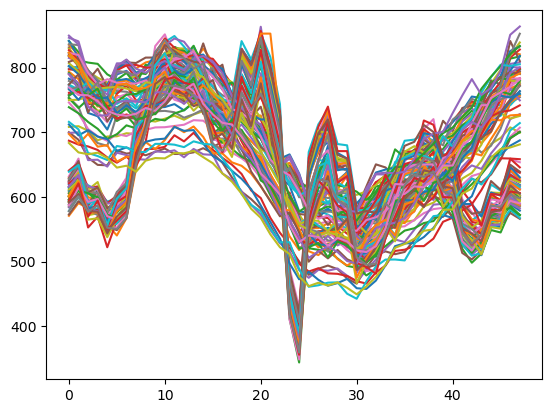

In [193]:
for i in range(amp_pi2.shape[0]):
    plt.plot(np.arange(48),amp_pi1.iloc[i,:])

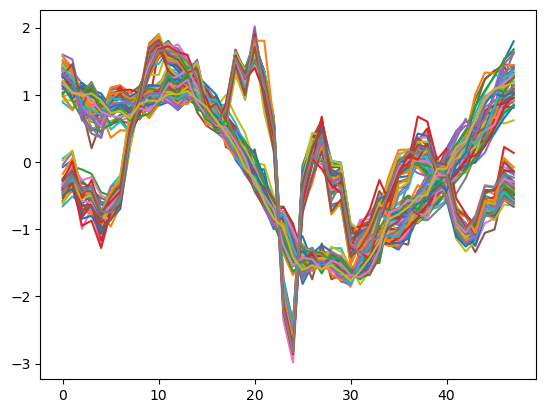

In [195]:
for i in range(amp_pi1_p.shape[0]):
    plt.plot(np.arange(48),amp_pi1_p[i,:])

In [239]:
subcarrier_std = np.std(amp_pi1_p, axis=0)  # 每个子载波的标准差
subcarrier_var = np.var(amp_pi1_p, axis=0)  # 每个子载波的方差
subcarrier_mean = np.mean(amp_pi1_p, axis=0)  # 每个子载波的均值
subcarrier_cv = subcarrier_std / subcarrier_mean  # 每个子载波的变异系数
print("各子載波統計量:")
print(f"STD: {subcarrier_std}")
print(f"VAR: {subcarrier_var}")
print(f"Mean: {subcarrier_mean}")
print(f"CV: {subcarrier_cv}")

print(f"STD mean: {np.mean(subcarrier_std)}")
print(f"VAR mean: {np.mean(subcarrier_var)}")
print(f"Mean mean: {np.mean(subcarrier_mean)}")
print(f"CV mean: {np.mean(subcarrier_cv)}")

各子載波統計量:
STD: [0.83597491 0.69085234 0.73668174 0.67214012 0.77648745 0.75719412
 0.69340246 0.22545582 0.10788387 0.28525013 0.34660685 0.26898127
 0.26953418 0.17893822 0.1933191  0.14126034 0.13035765 0.15994041
 0.62048509 0.58139308 0.94487917 0.82065341 0.62018017 0.54065897
 0.69018483 0.5675852  0.79933123 0.91575013 0.60088078 0.66841253
 0.28266763 0.23927825 0.2235742  0.29004671 0.27846823 0.44852091
 0.41038628 0.42925997 0.36284629 0.16748996 0.19279874 0.49048974
 0.65363716 0.72332525 0.6532988  0.74921315 0.71312314 0.80365628]
VAR: [0.69885405 0.47727695 0.54269999 0.45177235 0.60293276 0.57334294
 0.48080697 0.05083032 0.01163893 0.08136764 0.12013631 0.07235092
 0.07264868 0.03201889 0.03737227 0.01995448 0.01699312 0.02558094
 0.38500174 0.33801791 0.89279664 0.67347202 0.38462344 0.29231212
 0.4763551  0.32215296 0.63893041 0.83859831 0.36105771 0.44677531
 0.07990099 0.05725408 0.04998542 0.08412709 0.07754456 0.20117101
 0.1684169  0.18426412 0.13165743 0.028052